diego.herrerag00@uc.cl

# Misión 0

In [105]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('E2_data.csv')

df.head()

,Year,Month,Day,O3,PM2.5,Environmental_risk
0,2008,1,1,29.63,NaN,NaN
1,2008,1,2,21.46,NaN,NaN
2,2008,1,3,24.25,NaN,NaN
3,2008,1,4,29.04,NaN,NaN
4,2008,1,5,30.17,NaN,NaN


In [106]:
# Vemos los datos estadisticos de los valores numericos con describe() como pide el enunciado

df.describe()

,Year,Month,Day,O3,PM2.5
count,2984.000000,2984.000000,2984.000000,2878.000000,2725.000000
mean,2011.592493,6.419236,15.715818,16.313767,28.814594
std,2.357040,3.487660,8.804066,7.995680,17.479388
min,2008.000000,1.000000,1.000000,1.000000,5.000000
25%,2010.000000,3.000000,8.000000,9.392500,16.170000
50%,2012.000000,6.000000,16.000000,16.960000,23.210000
75%,2014.000000,9.000000,23.000000,22.357500,37.210000
max,2016.000000,12.000000,31.000000,56.300000,126.200000


# Misión 1

In [107]:
df.isnull().sum()


Year                    0
Month                   0
Day                     0
O3                    106
PM2.5                 259
Environmental_risk    328
dtype: int64

Como podemos ver, hay valores nulos. Por lo tanto, es necesario limpiarlos como pide el enunciado de dos formas distintas, creando un data frame nuevo para cada nueva forma.

## Limpieza 1

In [108]:
df_limpieza_1 = df.copy()
o3 = df["O3"].fillna(df["O3"].mean())
df_limpieza_1["O3"] = o3

df_limpieza_1.isnull().sum()

Year                    0
Month                   0
Day                     0
O3                      0
PM2.5                 259
Environmental_risk    328
dtype: int64

In [109]:
pm25 = df["PM2.5"].fillna(df["PM2.5"].mean())
df_limpieza_1["PM2.5"] = pm25

df_limpieza_1.isnull().sum()

Year                    0
Month                   0
Day                     0
O3                      0
PM2.5                   0
Environmental_risk    328
dtype: int64

In [110]:
df_limpieza_1["Environmental_risk"].value_counts()


Environmental_risk
medio      1605
Bajo        750
nulo        134
Alto        106
extremo      61
Name: count, dtype: int64

Dado que son valores de texto, por ahora, no se eliminaran dichos valores nulos por su promedio, ya que, no son valores numericos

In [111]:
# Vemos los datos estadisticos que nos piden: promedio, desviacion estandar, maximo, minimo, curtosis y la correlación, todo de O3 y PM2.5


media_O3 = df_limpieza_1['O3'].mean()
std_O3 = df_limpieza_1['O3'].std()
max_O3 = df_limpieza_1['O3'].max()
min_O3 = df_limpieza_1['O3'].min()
kurtosis_O3 = df_limpieza_1['O3'].kurtosis()

media_pm25 = df_limpieza_1['PM2.5'].mean()
std_pm25 = df_limpieza_1['PM2.5'].std()
max_pm25 = df_limpieza_1['PM2.5'].max()
min_pm25 = df_limpieza_1['PM2.5'].min()
kurtosis_pm25 = df_limpieza_1['PM2.5'].kurtosis()

corr_O3_pm25 = df_limpieza_1['O3'].corr(df_limpieza_1['PM2.5'])

# Creamos un DataFrame con los resultados obtenidos, que viene siendo la tabla que nos piden

tabla_limpieza_1 = pd.DataFrame({"Indicadores": ['Media', 'Desviación estándar', 'Máximo', 'Mínimo', 'Curtosis', 'Correlación O3-PM2.5'],
                           "03": [media_O3, std_O3, max_O3, min_O3, kurtosis_O3, corr_O3_pm25 ],
                           "PM2.5": [media_pm25, std_pm25, max_pm25, min_pm25, kurtosis_pm25, corr_O3_pm25]})
tabla_limpieza_1

,Indicadores,03,PM2.5
0,Media,16.313767,28.814594
1,Desviación estándar,7.852333,16.703334
2,Máximo,56.300000,126.200000
3,Mínimo,1.000000,5.000000
4,Curtosis,-0.225798,2.508613
5,Correlación O3-PM2.5,-0.459890,-0.459890


# Limpieza 2

In [112]:
df_limpieza_2 = df.dropna()
df_limpieza_2

,Year,Month,Day,O3,PM2.5,Environmental_risk
127,2008,5,7,8.46,48.53,medio
128,2008,5,8,12.96,56.57,medio
129,2008,5,9,12.00,54.00,medio
130,2008,5,10,15.33,69.40,medio
131,2008,5,11,18.12,91.08,medio
...,...,...,...,...,...,...
2979,2016,2,27,22.93,17.12,Bajo
2980,2016,2,28,26.70,15.33,Bajo
2981,2016,2,29,24.62,16.96,Bajo
2982,2016,3,1,28.86,32.67,medio


Para el caso de la columna "Environmental_risk", si se les eliminó los valores nulos y ya que, para esta ocación el reemplazo era diferente, a diferencia del anterior que el promedio es valido solo para valores numericos, acá solo se debían eliminar datos. 

In [113]:
df_limpieza_2.isnull().sum()

Year                  0
Month                 0
Day                   0
O3                    0
PM2.5                 0
Environmental_risk    0
dtype: int64

In [114]:
# Vemos los datos estadisticos que nos piden: promedio, desviacion estandar, maximo, minimo, curtosis y la correlación, todo de O3 y PM2.5


media_O3 = df_limpieza_2['O3'].mean()
std_O3 = df_limpieza_2['O3'].std()
max_O3 = df_limpieza_2['O3'].max()
min_O3 = df_limpieza_2['O3'].min()
kurtosis_O3 = df_limpieza_2['O3'].kurtosis()

media_pm25 = df_limpieza_2['PM2.5'].mean()
std_pm25 = df_limpieza_2['PM2.5'].std()
max_pm25 = df_limpieza_2['PM2.5'].max()
min_pm25 = df_limpieza_2['PM2.5'].min()
kurtosis_pm25 = df_limpieza_2['PM2.5'].kurtosis()

corr_O3_pm25 = df_limpieza_2['O3'].corr(df_limpieza_2['PM2.5'])

# Creamos un DataFrame con los resultados obtenidos, que viene siendo la tabla que nos piden

tabla_limpieza_2 = pd.DataFrame({"Indicadores": ['Media', 'Desviación estándar', 'Máximo', 'Mínimo', 'Curtosis', 'Correlación O3-PM2.5'],
                           "03": [media_O3, std_O3, max_O3, min_O3, kurtosis_O3, corr_O3_pm25 ],
                           "PM2.5": [media_pm25, std_pm25, max_pm25, min_pm25, kurtosis_pm25, corr_O3_pm25]})
tabla_limpieza_2

,Indicadores,03,PM2.5
0,Media,15.961303,28.986977
1,Desviación estándar,8.042349,17.596844
2,Máximo,56.300000,126.200000
3,Mínimo,1.000000,5.000000
4,Curtosis,-0.263541,1.958536
5,Correlación O3-PM2.5,-0.478451,-0.478451


Notar que los valores de `O3` y `PM2.5` son distintos, como debería darse.

# Misión 3

## Limpieza 1

array([[<Axes: title={'center': 'PM2.5'}>]], dtype=object)

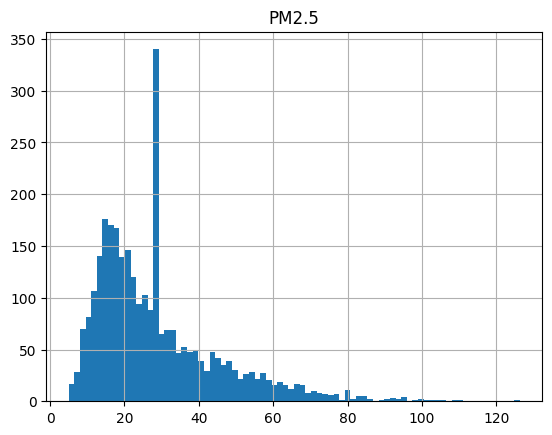

In [115]:
# Histograma de PM2.5

df_limpieza_1.hist("PM2.5",bins=80)

<Axes: title={'center': 'O3'}, xlabel='Month'>

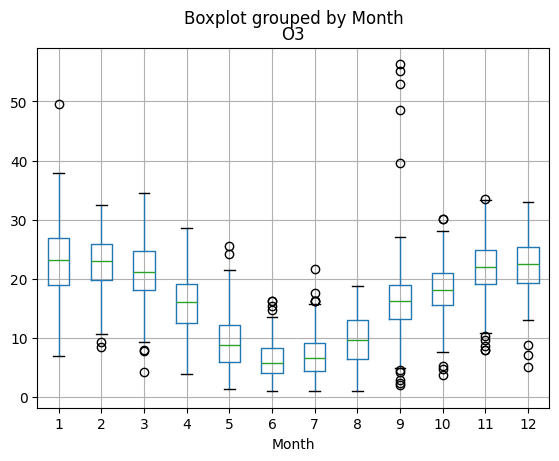

In [116]:
# Diagrama de caja de O3 por mes ("Month")
df_limpieza_1.boxplot("O3",by="Month")

In [117]:
#Evolución por año ("Year") de O3 y PM2.5
df_limpieza_1.groupby('Year')[['O3', 'PM2.5']].mean()

,O3,PM2.5
Year,,
2008,16.624617,30.599163
2009,18.179801,27.953020
2010,18.102381,29.161995
2011,15.838836,31.261104
2012,16.065205,25.023443
2013,15.110998,26.477296
2014,14.919165,30.185621
2015,14.957652,31.941206
2016,20.501292,16.565942


<Axes: xlabel='Year'>

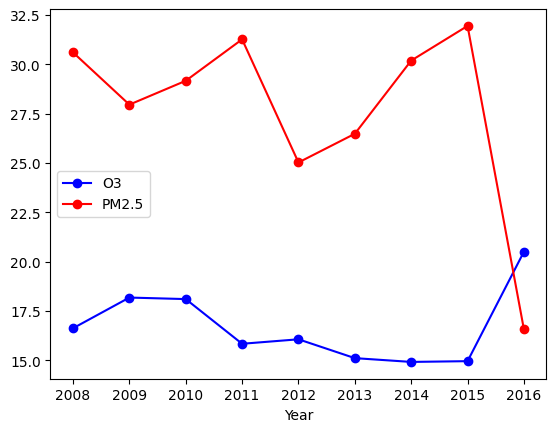

In [118]:
# De manera visual usando matplotlib
df_limpieza_1.groupby('Year')[['O3', 'PM2.5']].mean().plot(kind='line', marker='o', color=['blue', 'red'])

## Limpieza 2

array([[<Axes: title={'center': 'PM2.5'}>]], dtype=object)

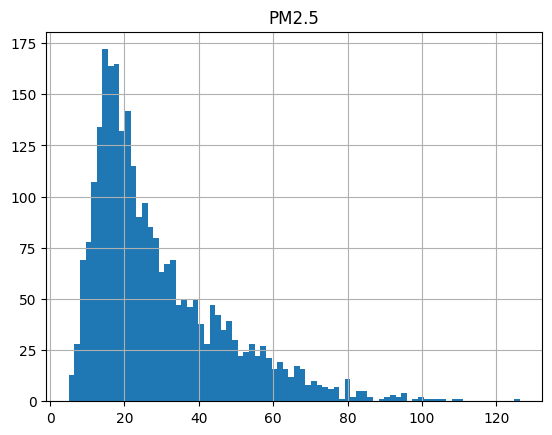

In [119]:
# Histograma de PM2.5
df_limpieza_2.hist("PM2.5",bins=80)

<Axes: title={'center': 'O3'}, xlabel='Month'>

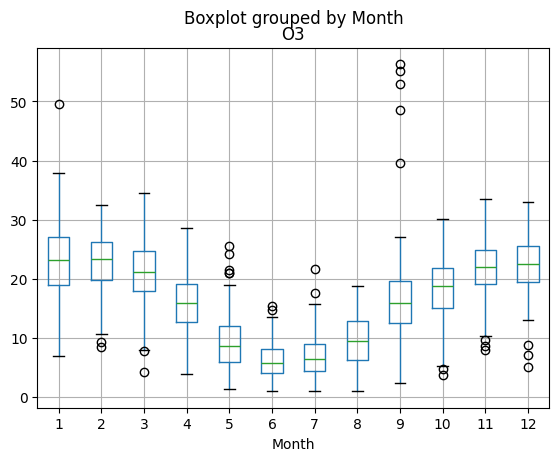

In [120]:
# Diagrama de caja de O3 por mes ("Month")
df_limpieza_2.boxplot("O3",by="Month")

In [121]:
#Evolución por año ("Year") de O3 y PM2.5
df_limpieza_2.groupby('Year')[['O3', 'PM2.5']].mean()

,O3,PM2.5
Year,,
2008,14.304812,31.547448
2009,18.067059,27.866275
2010,18.108790,29.206138
2011,15.833000,31.295083
2012,16.056780,24.788305
2013,14.835705,27.409718
2014,14.050309,30.519966
2015,14.611642,32.405821
2016,21.121667,15.639444


<Axes: xlabel='Year'>

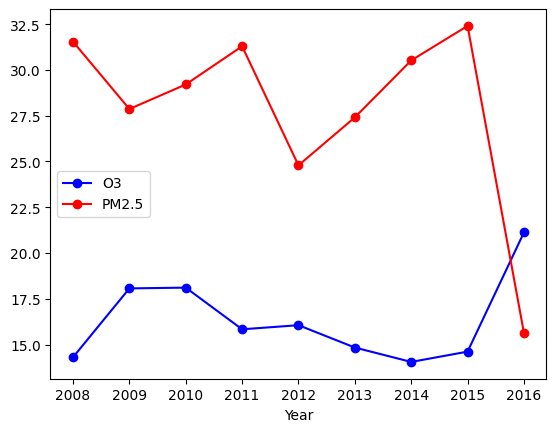

In [122]:
# De manera visual usando matplotlib
df_limpieza_2.groupby('Year')[['O3', 'PM2.5']].mean().plot(kind='line', marker='o', color=['blue', 'red'])

# Mision 4

In [123]:

def determinar_categoria(fila, media_O3, std_O3, media_PM25, std_PM25):
    if pd.isnull(fila['Environmental_risk']):
        if fila['O3'] > media_O3:
            if fila['O3'] > media_O3 + 2 * std_O3:
                return 'extremo'
            else:
                if fila['PM2.5'] > media_PM25:
                    if fila['PM2.5'] > media_PM25 + 2 * std_PM25:
                        return 'extremo'
                    else:
                        return 'Alto'
                else:
                    return 'medio'
        else:
            return 'Bajo'
    else:
        return fila['Environmental_risk']

## Limpieza 1

In [124]:
df_limpieza_1['Environmental_risk'].isna().value_counts()

Environmental_risk
False    2656
True      328
Name: count, dtype: int64

In [125]:
media_O3 = df_limpieza_1['O3'].mean()
std_O3 = df_limpieza_1['O3'].std()
media_PM25 = df_limpieza_1['PM2.5'].mean()
std_PM25 = df_limpieza_1['PM2.5'].std()
df_limpieza_1['Environmental_risk'] = df_limpieza_1.apply(determinar_categoria, args=(media_O3, std_O3, media_PM25, std_PM25), axis=1)

In [126]:
df_limpieza_1['Environmental_risk'].isna().value_counts()

Environmental_risk
False    2984
Name: count, dtype: int64

## Limpieza 2

In [127]:
df_limpieza_2['Environmental_risk'].isna().value_counts()

Environmental_risk
False    2656
Name: count, dtype: int64

In [128]:
media_O3 = df_limpieza_2['O3'].mean()
std_O3 = df_limpieza_2['O3'].std()
media_PM25 = df_limpieza_2['PM2.5'].mean()
std_PM25 = df_limpieza_2['PM2.5'].std()
df_limpieza_2['Environmental_risk'] = df_limpieza_2.apply(determinar_categoria, args=(media_O3, std_O3, media_PM25, std_PM25), axis=1)

/var/folders/z5/wvf1lf5579ld90s3v_k6rdt00000gn/T/ipykernel_8672/1467905535.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpieza_2['Environmental_risk'] = df_limpieza_2.apply(determinar_categoria, args=(media_O3, std_O3, media_PM25, std_PM25), axis=1)


In [129]:
df_limpieza_2['Environmental_risk'].isna().value_counts()

Environmental_risk
False    2656
Name: count, dtype: int64

## Mision 5

In [130]:
def asignar_estacion(mes):
    if mes in [1, 2, 12]:
        return 'Verano'
    elif mes in [4, 5, 3]:
        return 'Otoño'
    elif mes in [7, 8, 6]:
        return 'Invierno'
    else:
        return 'Primavera'

## Limpieza 1

In [131]:
df_limpieza_1['Estacion'] = df_limpieza_1['Month'].apply(asignar_estacion)
df_limpieza_1.head()

,Year,Month,Day,O3,PM2.5,Environmental_risk,Estacion
0,2008,1,1,29.63,28.814594,medio,Verano
1,2008,1,2,21.46,28.814594,medio,Verano
2,2008,1,3,24.25,28.814594,medio,Verano
3,2008,1,4,29.04,28.814594,medio,Verano
4,2008,1,5,30.17,28.814594,medio,Verano


In [132]:
df_limpieza_1.groupby(['Estacion', 'Year'])[['O3', 'PM2.5']].mean()

O3      PM2.5
Estacion  Year                      
Invierno  2008   7.083370  43.558370
          2009  10.351604  41.451898
          2010  10.665884  42.472048
          2011   7.160217  42.559674
          2012   8.296971  37.209565
          2013   8.009239  40.076087
          2014   4.991522  46.632523
          2015   5.297813  53.395752
Otoño     2008  15.798587  33.800085
          2009  16.968804  31.478913
          2010  18.681753  34.292958
          2011  14.494891  32.716196
          2012  15.714173  29.512609
          2013  12.928913  28.063854
          2014  14.828913  28.313578
          2015  15.211848  36.682306
          2016  28.820000  30.315000
Primavera 2008  18.942747  19.676044
          2009  19.633077  18.536154
          2010  19.066141  19.819982
          2011  20.447912  25.956974
          2012  20.115714  15.718132
          2013  18.195104  20.876576
          2014  16.921704  25.022593
          2015  16.358684  20.443843
Verano    2008  24.787692  25.184568
          2009  25.950444  20.071417
          2010  24.137417  19.756991
          2011  21.423834  23.587093
          2012  20.223187  17.470220
          2013  21.482778  16.617444
          2014  23.134889  20.507270
          2015  23.155709  16.788547
          2016  20.224002  16.107640

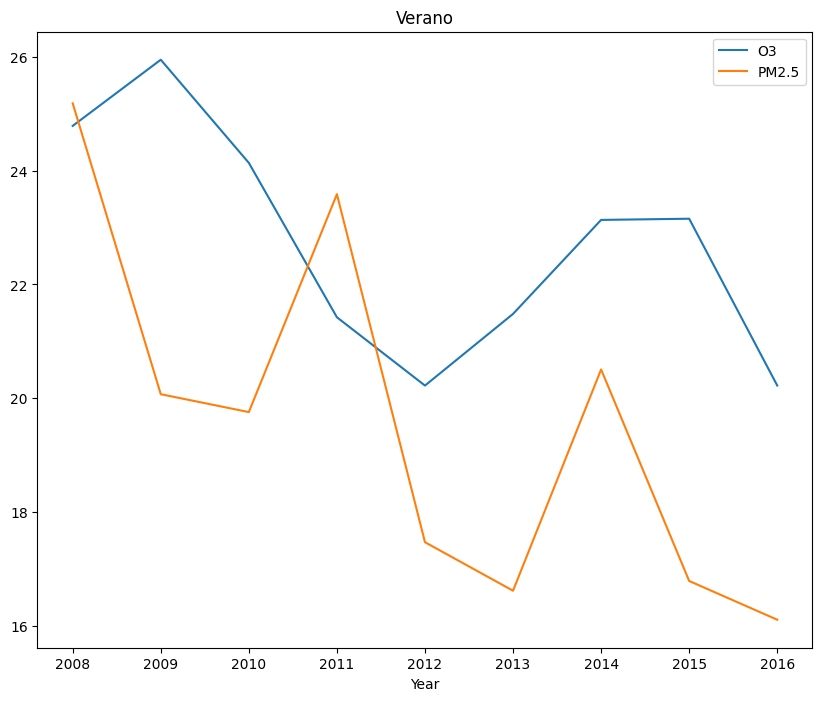

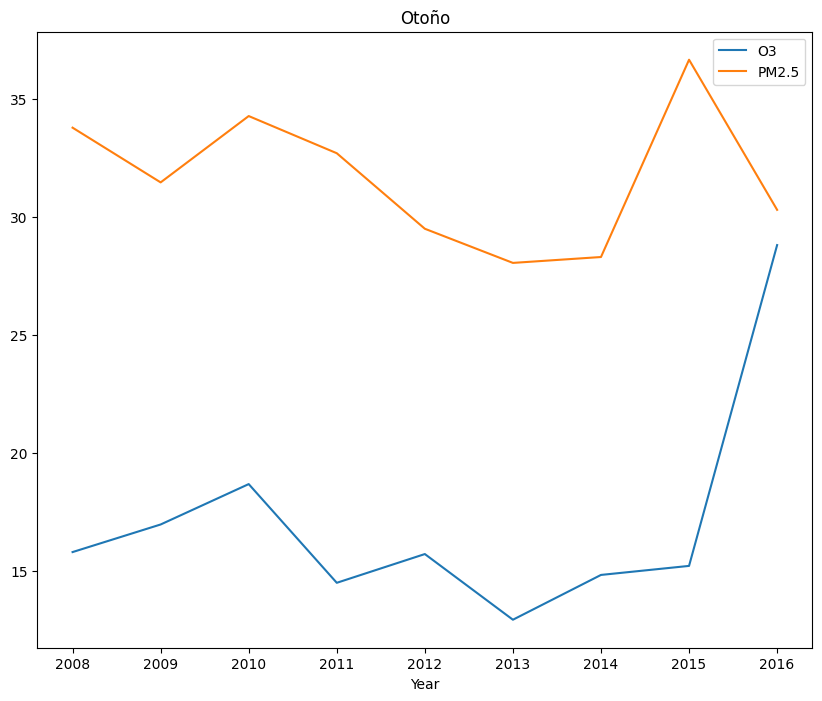

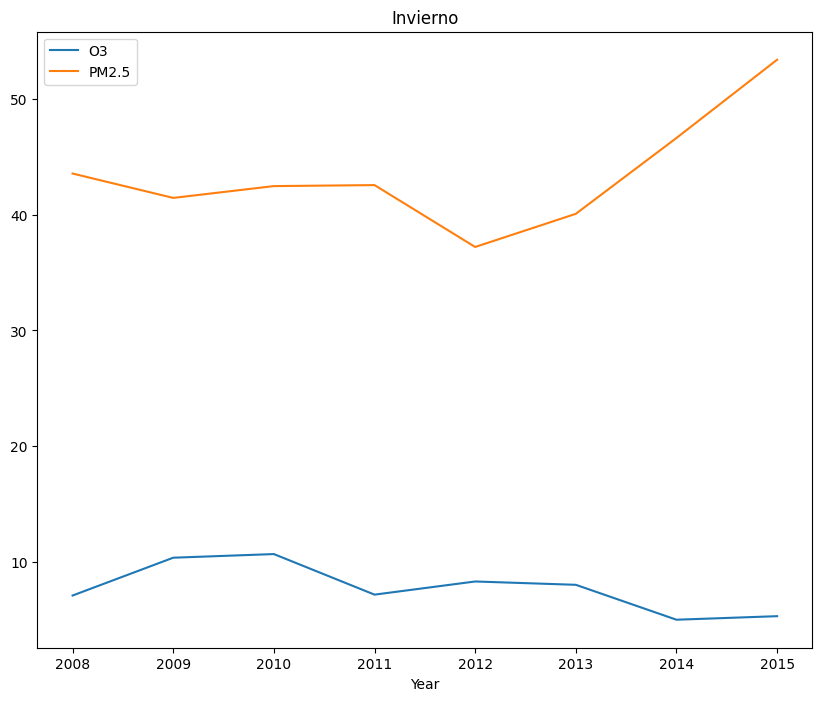

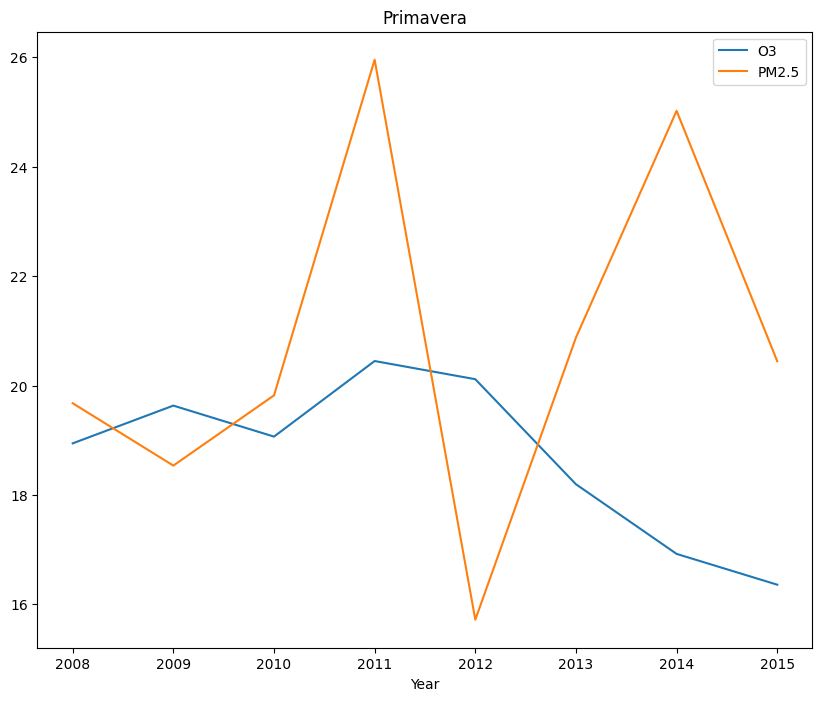

In [133]:
for value in pd.unique(df_limpieza_1['Estacion'].values):
    sub_df = df_limpieza_1[df_limpieza_1['Estacion'] == value]
    sub_df.groupby("Year")[["O3", "PM2.5"]].mean().plot.line(figsize=(10, 8))
    plt.title(value)
    plt.show()


## Limpieza 2

In [134]:
df_limpieza_2['Estacion'] = df_limpieza_2['Month'].apply(asignar_estacion)
df_limpieza_2.head()

/var/folders/z5/wvf1lf5579ld90s3v_k6rdt00000gn/T/ipykernel_8672/1005348010.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpieza_2['Estacion'] = df_limpieza_2['Month'].apply(asignar_estacion)


,Year,Month,Day,O3,PM2.5,Environmental_risk,Estacion
127,2008,5,7,8.46,48.53,medio,Otoño
128,2008,5,8,12.96,56.57,medio,Otoño
129,2008,5,9,12.00,54.00,medio,Otoño
130,2008,5,10,15.33,69.40,medio,Otoño
131,2008,5,11,18.12,91.08,medio,Otoño


In [135]:
df_limpieza_2.groupby(['Estacion', 'Year'])[['O3', 'PM2.5']].mean()

O3      PM2.5
Estacion  Year                      
Invierno  2008   7.083370  43.558370
          2009  10.219111  41.465222
          2010  10.490341  43.092841
          2011   7.160217  42.559674
          2012   8.026742  37.200899
          2013   8.009239  40.076087
          2014   4.926941  48.099882
          2015   4.664713  55.456207
Otoño     2008   8.758400  47.161200
          2009  16.968804  31.478913
          2010  18.440118  34.744118
          2011  14.494891  32.716196
          2012  15.649157  29.446265
          2013  12.877802  28.055604
          2014  14.799667  28.302444
          2015  14.296118  37.330235
          2016  28.820000  30.315000
Primavera 2008  18.942747  19.676044
          2009  19.633077  18.536154
          2010  19.226163  19.402442
          2011  20.496889  25.925222
          2012  20.115714  15.718132
          2013  19.356739  21.914565
          2014  13.961250  20.083750
          2015  16.368267  18.731333
Verano    2008  26.594516  18.158710
          2009  25.981905  19.446905
          2010  24.315227  19.551136
          2011  21.661512  23.343953
          2012  20.223187  17.470220
          2013  21.482778  16.617444
          2014  23.413553  18.976974
          2015  23.253182  16.515227
          2016  20.825577  15.075000

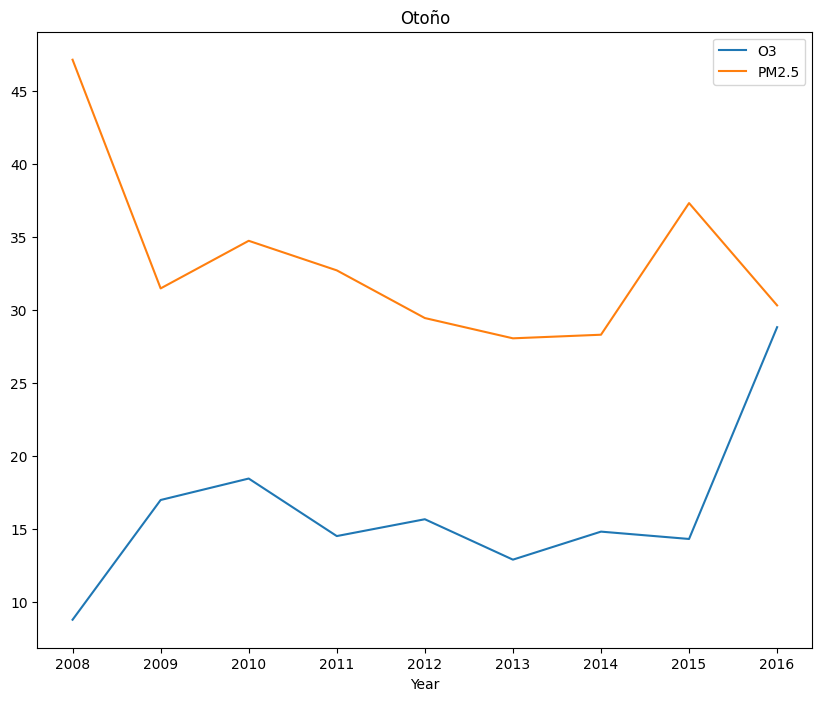

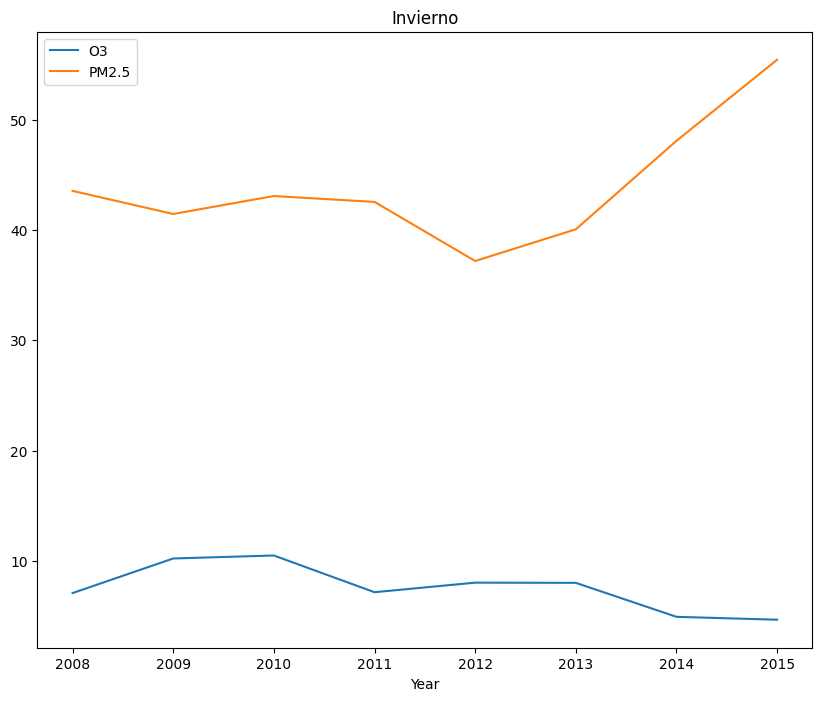

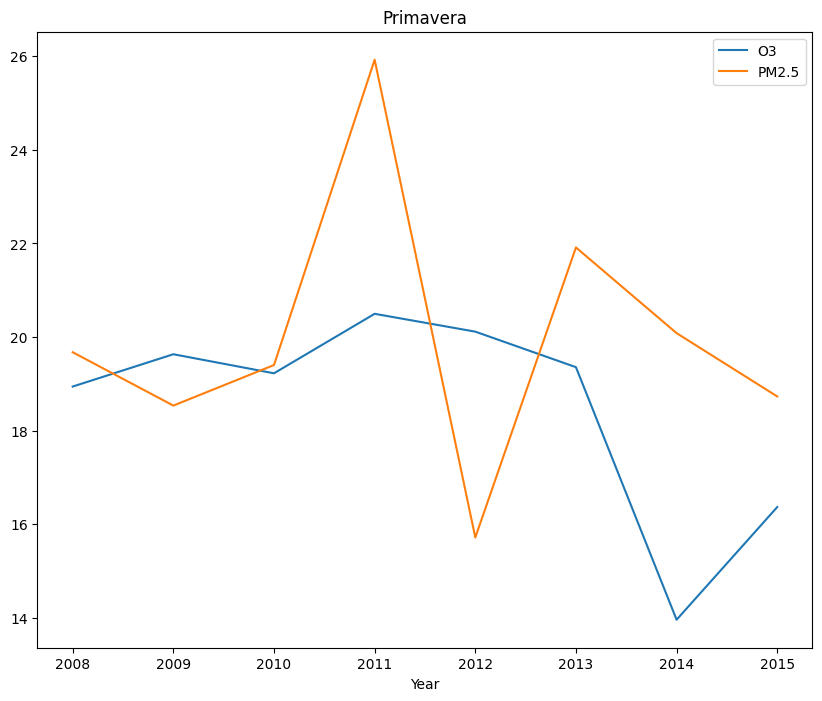

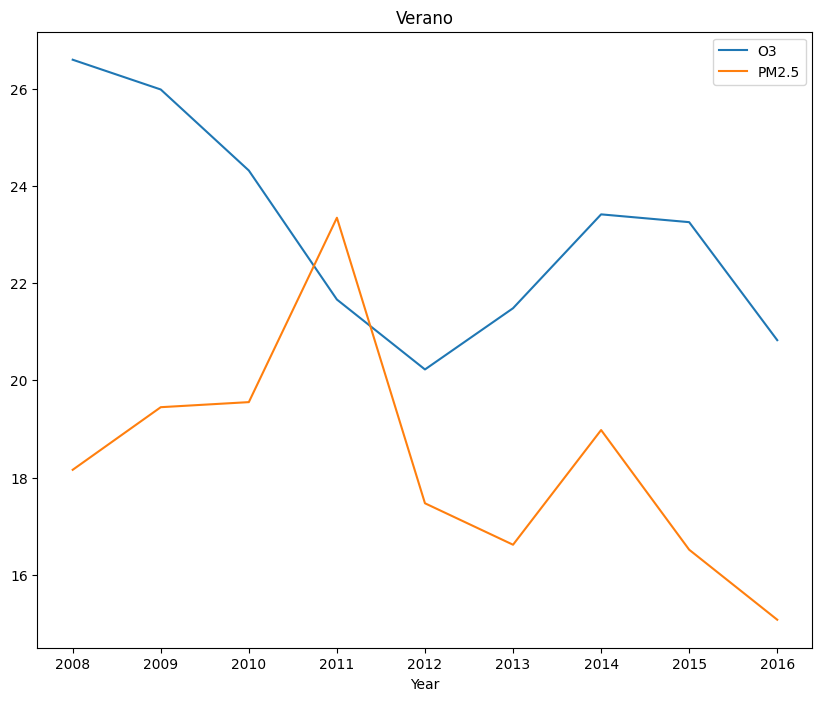

In [136]:
for value in pd.unique(df_limpieza_2['Estacion'].values):
    sub_df = df_limpieza_2[df_limpieza_2['Estacion'] == value]
    sub_df.groupby("Year")[["O3", "PM2.5"]].mean().plot.line(figsize=(10, 8))
    plt.title(value)
    plt.show()


# Mision 6

## Limpieza 1

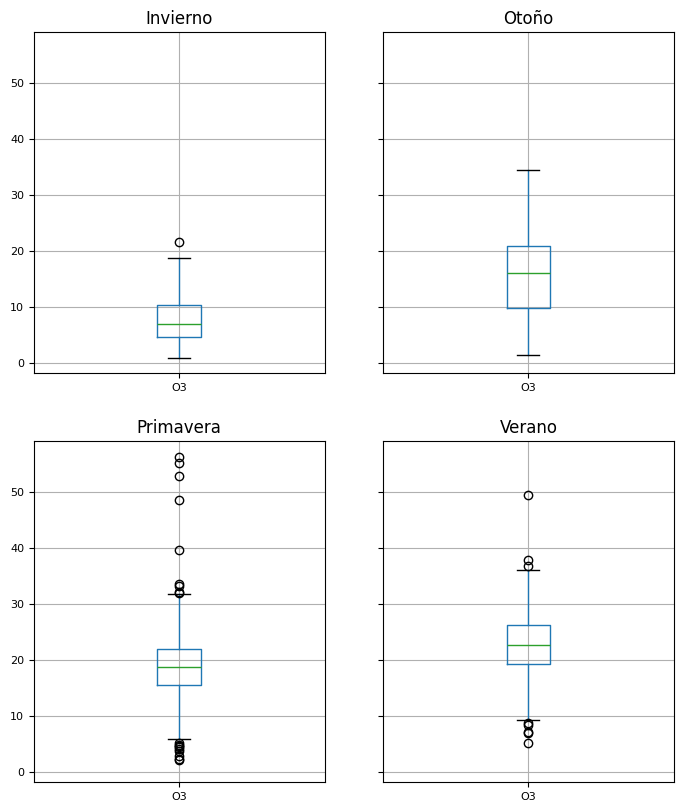

In [137]:
df_limpieza_1.groupby('Estacion').boxplot(column='O3', fontsize=8, figsize=(8, 10))
plt.show()

In [138]:
# Creamos una Serie vacía para almacenar el primer cuartil (Q1) de cada fila
Q1 = pd.Series(index=df_limpieza_1.index, dtype=float)

# Creamos una Serie vacía para almacenar el tercer cuartil (Q3) de cada fila
Q3 = pd.Series(index=df_limpieza_1.index, dtype=float)

# Iteramos por cada estación única en el DataFrame
for estacion in df_limpieza_1['Estacion'].unique():
    # Creamos una máscara booleana para seleccionar las filas de la estación actual
    mask = df_limpieza_1['Estacion'] == estacion
    # Asignamos el valor del primer cuartil de O3 para esa estación a las filas correspondientes
    Q1[mask] = df_limpieza_1.loc[mask, 'O3'].quantile(0.25)
    # Asignamos el valor del tercer cuartil de O3 para esa estación a las filas correspondientes
    Q3[mask] = df_limpieza_1.loc[mask, 'O3'].quantile(0.75)

# Calculamos el rango intercuartílico (IQR) para cada fila
IQR = Q3 - Q1

In [139]:
# Filtramos el DataFrame para crear otro que congenta solo los valores atipicos o outliers
df_atipicos_1 = df_limpieza_1[(df_limpieza_1['O3'] < Q1 - 1.5 * IQR) | (df_limpieza_1['O3'] > Q3 + 1.5 * IQR)]

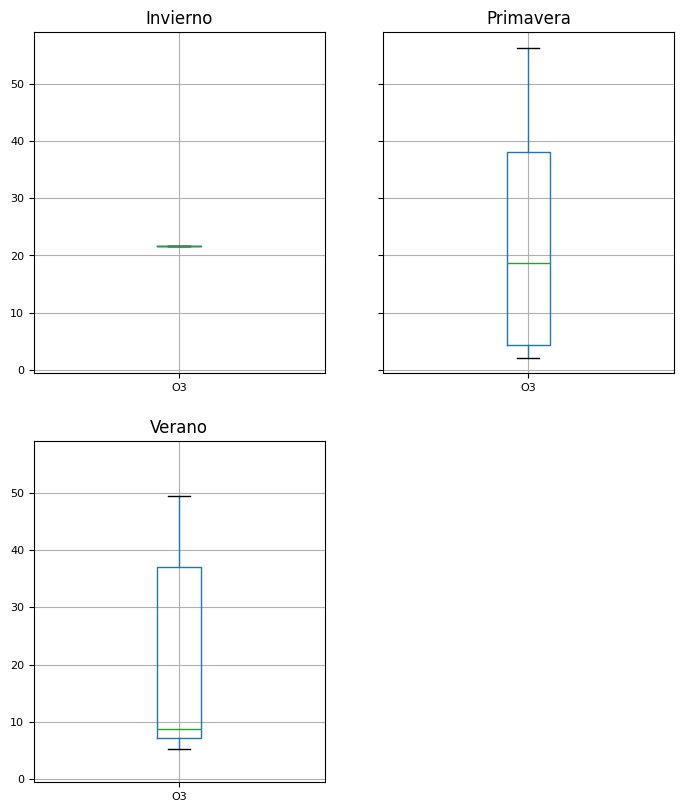

In [140]:
df_atipicos_1.groupby('Estacion').boxplot(column='O3', fontsize=8, figsize=(8, 10))
plt.show()

## Limpieza 2

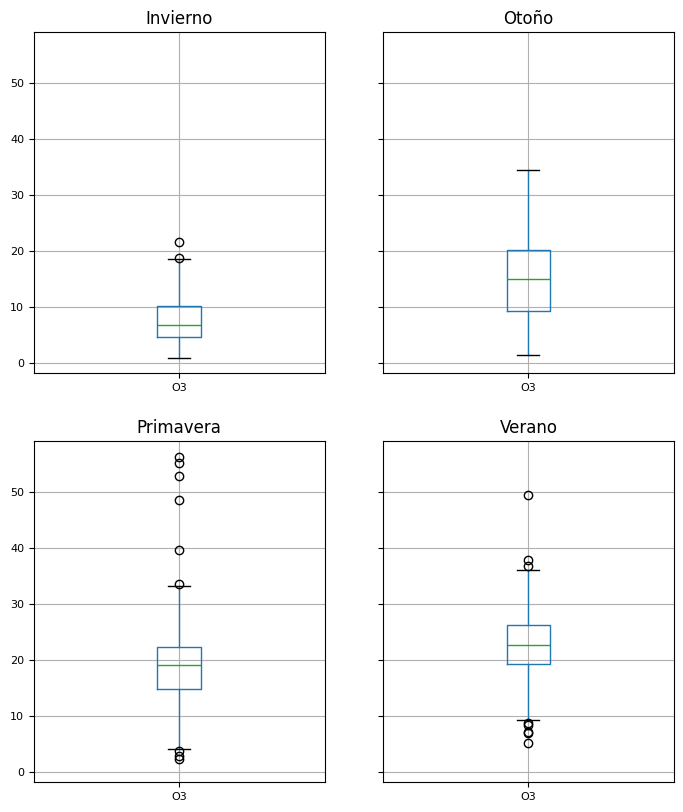

In [141]:
df_limpieza_2.groupby('Estacion').boxplot(column='O3', fontsize=8, figsize=(8, 10))
plt.show()

In [142]:
# Creamos una Serie vacía para almacenar el primer cuartil (Q1) de cada fila
Q1 = pd.Series(index=df_limpieza_2.index, dtype=float)

# Creamos una Serie vacía para almacenar el tercer cuartil (Q3) de cada fila
Q3 = pd.Series(index=df_limpieza_2.index, dtype=float)

# Iteramos por cada estación única en el DataFrame
for estacion in df_limpieza_2['Estacion'].unique():
    # Creamos una máscara booleana para seleccionar las filas de la estación actual
    mask = df_limpieza_2['Estacion'] == estacion
    # Asignamos el valor del primer cuartil de O3 para esa estación a las filas correspondientes
    Q1[mask] = df_limpieza_2.loc[mask, 'O3'].quantile(0.25)
    # Asignamos el valor del tercer cuartil de O3 para esa estación a las filas correspondientes
    Q3[mask] = df_limpieza_2.loc[mask, 'O3'].quantile(0.75)

# Calculamos el rango intercuartílico (IQR) para cada fila
IQR = Q3 - Q1

In [143]:
# Filtramos el DataFrame para crear otro que congenta solo los valores atipicos o outliers
df_atipicos_2 = df_limpieza_2[(df_limpieza_2['O3'] < Q1 - 1.5 * IQR) | (df_limpieza_2['O3'] > Q3 + 1.5 * IQR)]

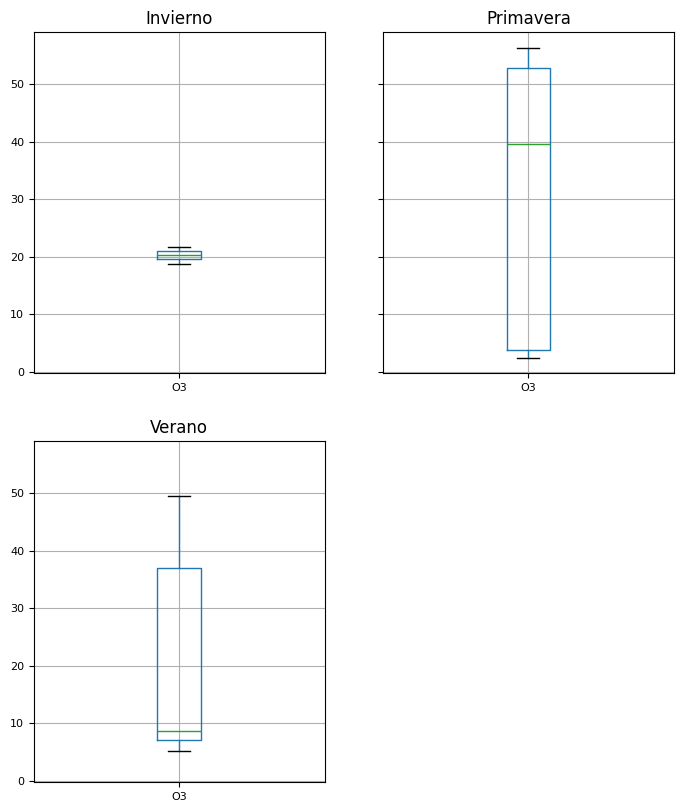

In [144]:
df_atipicos_2.groupby('Estacion').boxplot(column='O3', fontsize=8, figsize=(8, 10))
plt.show()

# Mision 7

In [145]:
df_limpieza_2['ratio'] = df_limpieza_2['O3'] / df_limpieza_2['PM2.5']
df_limpieza_2.head()

/var/folders/z5/wvf1lf5579ld90s3v_k6rdt00000gn/T/ipykernel_8672/1776227711.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpieza_2['ratio'] = df_limpieza_2['O3'] / df_limpieza_2['PM2.5']


,Year,Month,Day,O3,PM2.5,Environmental_risk,Estacion,ratio
127,2008,5,7,8.46,48.53,medio,Otoño,0.174325
128,2008,5,8,12.96,56.57,medio,Otoño,0.229097
129,2008,5,9,12.00,54.00,medio,Otoño,0.222222
130,2008,5,10,15.33,69.40,medio,Otoño,0.220893
131,2008,5,11,18.12,91.08,medio,Otoño,0.198946


In [146]:
df_limpieza_2['Fecha'] = pd.to_datetime(df_limpieza_2[['Year', 'Month', 'Day']])
df_limpieza_2['Día de la Semana'] = df_limpieza_2['Fecha'].dt.dayofweek

tipo_dia = []
for i  in df_limpieza_2['Día de la Semana']:
    if i >= 5:
        tipo_dia.append('Fin de Semana')
    else:
        tipo_dia.append('Día Laboral')

df_limpieza_2['Tipo de Día'] = tipo_dia
df_limpieza_2.head()

/var/folders/z5/wvf1lf5579ld90s3v_k6rdt00000gn/T/ipykernel_8672/2859334322.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpieza_2['Fecha'] = pd.to_datetime(df_limpieza_2[['Year', 'Month', 'Day']])
/var/folders/z5/wvf1lf5579ld90s3v_k6rdt00000gn/T/ipykernel_8672/2859334322.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpieza_2['Día de la Semana'] = df_limpieza_2['Fecha'].dt.dayofweek
/var/folders/z5/wvf1lf5579ld90s3v_k6rdt00000gn/T/ipykernel_8672/2859334322.py:11: SettingWithCopyWarning:

,Year,Month,Day,O3,PM2.5,Environmental_risk,Estacion,ratio,Fecha,Día de la Semana,Tipo de Día
127,2008,5,7,8.46,48.53,medio,Otoño,0.174325,2008-05-07,2,Día Laboral
128,2008,5,8,12.96,56.57,medio,Otoño,0.229097,2008-05-08,3,Día Laboral
129,2008,5,9,12.00,54.00,medio,Otoño,0.222222,2008-05-09,4,Día Laboral
130,2008,5,10,15.33,69.40,medio,Otoño,0.220893,2008-05-10,5,Fin de Semana
131,2008,5,11,18.12,91.08,medio,Otoño,0.198946,2008-05-11,6,Fin de Semana


In [147]:
o3_limite = df_limpieza_2['O3'].quantile(0.95)
pm25_limite = df_limpieza_2['PM2.5'].quantile(0.95)

df_limpieza_2['Niveles Extremos'] = (df_limpieza_2['O3'] > o3_limite) | (df_limpieza_2['PM2.5'] > pm25_limite)
df_limpieza_2 = df_limpieza_2.sort_values(by='Fecha')
df_limpieza_2['Día Consecutivo'] = (df_limpieza_2['Niveles Extremos'] & df_limpieza_2['Niveles Extremos'].shift(1)).astype(int)

df_limpieza_2.head()

/var/folders/z5/wvf1lf5579ld90s3v_k6rdt00000gn/T/ipykernel_8672/3236530742.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpieza_2['Niveles Extremos'] = (df_limpieza_2['O3'] > o3_limite) | (df_limpieza_2['PM2.5'] > pm25_limite)


,Year,Month,Day,O3,PM2.5,Environmental_risk,Estacion,ratio,Fecha,Día de la Semana,Tipo de Día,Niveles Extremos,Día Consecutivo
127,2008,5,7,8.46,48.53,medio,Otoño,0.174325,2008-05-07,2,Día Laboral,False,0
128,2008,5,8,12.96,56.57,medio,Otoño,0.229097,2008-05-08,3,Día Laboral,False,0
129,2008,5,9,12.00,54.00,medio,Otoño,0.222222,2008-05-09,4,Día Laboral,False,0
130,2008,5,10,15.33,69.40,medio,Otoño,0.220893,2008-05-10,5,Fin de Semana,True,0
131,2008,5,11,18.12,91.08,medio,Otoño,0.198946,2008-05-11,6,Fin de Semana,True,1


In [148]:
tabla_dinamica = pd.pivot_table(
    df_limpieza_2,
    values=['O3', 'PM2.5'],
    index='Month',
    columns='Environmental_risk',
    aggfunc='mean'
)

tabla_dinamica.head(10)

O3                                             \
Environmental_risk       Alto       Bajo    extremo      medio      nulo   
Month                                                                      
1                   28.356887        NaN        NaN        NaN  19.30694   
2                         NaN  20.472920  28.683333  24.585056       NaN   
3                         NaN  18.042683  28.500000  23.477815       NaN   
4                         NaN  13.508889        NaN  16.205899       NaN   
5                         NaN   7.564000        NaN   9.380538       NaN   
6                         NaN   8.238235        NaN   6.088698       NaN   
7                         NaN  10.913889        NaN   6.544133       NaN   
8                         NaN  10.574146        NaN   9.435126       NaN   
9                         NaN  15.554167  47.975000  16.434839       NaN   
10                        NaN  16.772712        NaN  20.345233       NaN   

                        PM2.5                                              
Environmental_risk       Alto       Bajo    extremo      medio       nulo  
Month                                                                      
1                   22.833679        NaN        NaN        NaN  14.959851  
2                         NaN  14.361327  16.360556  25.846404        NaN  
3                         NaN  14.728171  17.110000  26.388824        NaN  
4                         NaN  15.458889        NaN  32.021124        NaN  
5                         NaN  13.992667        NaN  45.399641        NaN  
6                         NaN  13.955882        NaN  51.995256        NaN  
7                         NaN  12.557222        NaN  49.882267        NaN  
8                         NaN  14.184634        NaN  39.751859        NaN  
9                         NaN  13.349028  13.500000  30.354032        NaN  
10                        NaN  14.097203        NaN  24.620000        NaN

In [149]:
df_limpieza_2['O3_Media'] = df_limpieza_2.groupby('Estacion')['O3'].rolling(window=7, min_periods=1).mean().reset_index(level=0, drop=True)
df_limpieza_2['PM2.5_Media'] = df_limpieza_2.groupby('Estacion')['PM2.5'].rolling(window=7, min_periods=1).mean().reset_index(level=0, drop=True)

df_limpieza_2.head(10)

,Year,Month,Day,O3,PM2.5,Environmental_risk,Estacion,ratio,Fecha,Día de la Semana,Tipo de Día,Niveles Extremos,Día Consecutivo,O3_Media,PM2.5_Media
127,2008,5,7,8.46,48.53,medio,Otoño,0.174325,2008-05-07,2,Día Laboral,False,0,8.460000,48.530000
128,2008,5,8,12.96,56.57,medio,Otoño,0.229097,2008-05-08,3,Día Laboral,False,0,10.710000,52.550000
129,2008,5,9,12.00,54.00,medio,Otoño,0.222222,2008-05-09,4,Día Laboral,False,0,11.140000,53.033333
130,2008,5,10,15.33,69.40,medio,Otoño,0.220893,2008-05-10,5,Fin de Semana,True,0,12.187500,57.125000
131,2008,5,11,18.12,91.08,medio,Otoño,0.198946,2008-05-11,6,Fin de Semana,True,1,13.374000,63.916000
132,2008,5,12,12.88,55.09,medio,Otoño,0.233799,2008-05-12,0,Día Laboral,False,0,13.291667,62.445000
133,2008,5,13,12.92,59.19,medio,Otoño,0.218280,2008-05-13,1,Día Laboral,False,0,13.238571,61.980000
134,2008,5,14,13.92,42.94,medio,Otoño,0.324173,2008-05-14,2,Día Laboral,False,0,14.018571,61.181429
135,2008,5,15,12.08,81.66,medio,Otoño,0.147930,2008-05-15,3,Día Laboral,True,0,13.892857,64.765714
136,2008,5,16,16.25,72.38,medio,Otoño,0.224510,2008-05-16,4,Día Laboral,True,1,14.500000,67.391429
